## EXPERIMENT 1: MagFace

In [1]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *

from IPython import embed


### AdaFace Results

This notebook loads the feature vectors from MagFace and run them through the results metrics:
FNIR, FPIR, FND, FPD, and GARBE

In [2]:
feature_list_children = '../../data/data_full/feature_vectors/adaface_feature_vectors/similarity_scores_children_full_baseline1.pt'
feature_list_adults = '../../data/data_full/feature_vectors/adaface_feature_vectors/similarity_scores_adults_bibel_baseline_1.pt'


def load_and_compute_similarity(feature_list, dtype=np.float32):
    # Load data
    image_names, ids, num_ids, norm_feats = load_adaface_vectors(feature_list)

    # Convert dtype to reduce memory usage
    norm_feats = norm_feats.astype(dtype)

    # Compute similarity matrix incrementally if possible
    sim_mat = np.dot(norm_feats, norm_feats.T)

    return image_names, ids, num_ids, sim_mat


In [3]:
# Load and compute for children
image_names_c, ids_c, num_ids_c, sim_mat_c = load_and_compute_similarity(feature_list_children)


In [5]:
image_names_c

['African_0_0',
 'African_0_1',
 'African_1_11',
 'African_1_4',
 'African_10_1',
 'African_10_3',
 'African_10_4',
 'African_10_7',
 'African_100_1',
 'African_100_3',
 'African_101_0',
 'African_101_1',
 'African_102_0',
 'African_102_1',
 'African_103_0',
 'African_103_2',
 'African_104_0',
 'African_104_1',
 'African_104_2',
 'African_106_0',
 'African_106_2',
 'African_107_0',
 'African_107_1',
 'African_107_2',
 'African_108_22',
 'African_108_9',
 'African_109_0',
 'African_109_11',
 'African_109_3',
 'African_109_4',
 'African_109_7',
 'African_109_8',
 'African_11_2',
 'African_11_36',
 'African_11_5',
 'African_11_69',
 'African_110_0',
 'African_111_0',
 'African_112_0',
 'African_112_1',
 'African_113_0',
 'African_113_11',
 'African_113_12',
 'African_113_22',
 'African_113_23',
 'African_113_3',
 'African_113_33',
 'African_113_4',
 'African_113_40',
 'African_113_45',
 'African_113_46',
 'African_113_49',
 'African_114_0',
 'African_114_1',
 'African_114_2',
 'African_11

In [4]:
# Load and compute for adults
image_names_a, ids_a, num_ids_a, sim_mat_a = load_and_compute_similarity(feature_list_adults)


ValueError: too many values to unpack (expected 2)

In [5]:
# Dataframes with info, removes names not in adaface results
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_all = children_all[children_all.image_name.isin(image_names_c)]

adults_all_org = pd.read_csv('../../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv')
adults_all = adults_all_org[adults_all_org.image_name.isin(image_names_a)]

In [6]:
her = 1
image_names_a[her], ids_a[her], num_ids_a[her]

('m.048v_w_0004', 'm.048v_w', 0)

### GET METRICS 10 TIMES

In [7]:
# random_states = [1,2,3,4,5,6,7,8,9,10]
# sim_mat_dict_all_magface_ex1_1 = {}
# FNIR_c_list=[]
# FNIR_a_list=[]
# FPIR_c_list=[]
# FPIR_a_list=[]
# FPD_list=[]
# FND_list=[]
# GARBE_list=[]

# for random_state_i in random_states:

#     ### Load children and adults balanced data ###
#     children_balanced_df_i = balance_child_data(children_all, print_stats=False, random_state=random_state_i)
#     adults_balanced_df_i = balance_adults_data_enrolled(children_balanced_df_i, adults_all, print_stats=False, random_state=random_state_i)



#     ### All reference image names, enrolled and non-enrolled image names - children ###
#     c_mates = children_balanced_df_i.groupby("identity_name").agg({'identity_name': ['count']})
#     enrolled_identity_names_c = c_mates[c_mates[('identity_name', 'count')] > 1].index
#     enrolled_image_names_c = list(children_balanced_df_i[children_balanced_df_i["identity_name"].isin(enrolled_identity_names_c)].image_name)
#     non_enrolled_identity_names_c = c_mates[c_mates[('identity_name', 'count')] == 1].index
#     non_enrolled_image_names_c = list(children_balanced_df_i[children_balanced_df_i["identity_name"].isin(non_enrolled_identity_names_c)].image_name)
#     all_reference_image_names_c = list(children_balanced_df_i.image_name)


#     ### All reference image names, enrolled and non-enrolled image names - adults ###
#     a_mates = adults_balanced_df_i.groupby("identity_name").agg({'identity_name': ['count']})
#     enrolled_identity_names_a = a_mates[a_mates[('identity_name', 'count')] > 1].index
#     enrolled_image_names_a = list(adults_balanced_df_i[adults_balanced_df_i["identity_name"].isin(enrolled_identity_names_a)].image_name)
#     non_enrolled_identity_names_a = a_mates[a_mates[('identity_name', 'count')] == 1].index
#     non_enrolled_image_names_a = list(adults_balanced_df_i[adults_balanced_df_i["identity_name"].isin(non_enrolled_identity_names_a)].image_name)
#     all_reference_image_names_a = list(adults_balanced_df_i.image_name)



#     ### Similarity matrices for ids in reference database ###
#     indices_c_all_reference = [image_names_c.index(name) for name in all_reference_image_names_c]
#     indices_a_all_reference = [image_names_a.index(name) for name in all_reference_image_names_a]



#     # Extract corresponding columns from the similarity matrix
#     sim_mat_c_reference_cols = sim_mat_c[:, indices_c_all_reference]


#     sim_mat_a_reference_cols = sim_mat_a[:, indices_a_all_reference]

#     # Extract corresponding rows from the numerical ids
#     num_ids_c_reference = num_ids_c[indices_c_all_reference]
#     num_ids_a_reference = num_ids_a[indices_a_all_reference]


#     ### Similarity matrices for non-enrolled ids ###
#     # Get indices of all feature and numerical id elements that are non-enrolled  ids
#     indices_c_non_enrolled = [image_names_c.index(name) for name in non_enrolled_image_names_c]
#     indices_a_non_enrolled = [image_names_a.index(name) for name in non_enrolled_image_names_a]


#     # Extract corresponding rows from the similarity matrix
#     sim_mat_c_non_enrolled_0 = sim_mat_c_reference_cols[indices_c_non_enrolled]
#     sim_mat_a_non_enrolled_0 = sim_mat_a_reference_cols[indices_a_non_enrolled]

#     # Extract corresponding rows from the numerical ids
#     num_ids_c_non_enrolled = num_ids_c[indices_c_non_enrolled]
#     num_ids_a_non_enrolled = num_ids_a[indices_a_non_enrolled]


#     ### Similarity matrices for enrolled ids ###
#     # Get indices of all feature and numerical id elements that are enrolled ids
#     indices_c_enrolled = [image_names_c.index(name) for name in enrolled_image_names_c]
#     indices_a_enrolled = [image_names_a.index(name) for name in enrolled_image_names_a]

#     # Extract corresponding rows from the similarity matrix
#     sim_mat_c_enrolled_0 = sim_mat_c[np.ix_(indices_c_enrolled, indices_c_enrolled)] # only enrolled columns and rows
#     sim_mat_a_enrolled_0 = sim_mat_a[np.ix_(indices_a_enrolled, indices_a_enrolled)]

#     # Extract corresponding rows from the numerical ids
#     num_ids_c_enrolled = num_ids_c[indices_c_enrolled]
#     num_ids_a_enrolled = num_ids_a[indices_a_enrolled]


#     ### DET THINGS ###

#     thold = (np.percentile(sim_mat_c,90)+np.percentile(sim_mat_a,90))/2

#     ### Evaluation metrics ###
#     # FNIR
#     FNIR_c, sim_mat_c_enrolled = compute_fnir(sim_mat_c_enrolled_0, sim_mat_c, enrolled_identity_names_c, num_ids_c_enrolled, ids_c, thold=thold)
#     FNIR_a, sim_mat_a_enrolled = compute_fnir(sim_mat_a_enrolled_0, sim_mat_a, enrolled_identity_names_a, num_ids_a_enrolled, ids_a, thold=thold)
#     # FPIR
#     FPIR_c = compute_fpir(sim_mat_c_non_enrolled_0, num_ids_c_non_enrolled, num_ids_c_reference, thold=thold)
#     FPIR_a = compute_fpir(sim_mat_a_non_enrolled_0, num_ids_a_non_enrolled, num_ids_a_reference, thold=thold)




#     # OBS maybe compute Garbe outside funtion to choose a good alpha?
#     alpha_garbe = 0.25
#     FPD_i, FND_i, GARBE_i = GARBE(FNIR_c, FNIR_a, FPIR_c, FPIR_a, alpha=alpha_garbe)


#     FNIR_c_list.append(FNIR_c)
#     FNIR_a_list.append(FNIR_a)
#     FPIR_c_list.append(FPIR_c)
#     FPIR_a_list.append(FPIR_a)
#     FPD_list.append(FPD_i)
#     FND_list.append(FND_i)
#     GARBE_list.append(GARBE_i)

#     sim_mat_dict_all_magface_ex1_1['sim_mat_c_enrolled_iteration_{}'.format(random_state_i)]=sim_mat_c_enrolled
#     sim_mat_dict_all_magface_ex1_1['sim_mat_a_enrolled_iteration_{}'.format(random_state_i)]=sim_mat_a_enrolled
#     sim_mat_dict_all_magface_ex1_1['sim_mat_c_non_enrolled_iteration_{}'.format(random_state_i)]=remove_ones(sim_mat_c_non_enrolled_0)
#     sim_mat_dict_all_magface_ex1_1['sim_mat_a_non_enrolled_iteration_{}'.format(random_state_i)]=remove_ones(sim_mat_a_non_enrolled_0)


#     print("done")

# # Create a DataFrame from the lists
# data = {'Iteration': random_states,'FNIR_c': FNIR_c_list, 'FNIR_a': FNIR_a_list, "FPIR_c": FPIR_c_list, "FPIR_a": FPIR_a_list, "FPD": FPD_list, "FND": FND_list, "GARBE": GARBE_list, "Threshold": thold}
# df_all_results = pd.DataFrame(data)


FPD result:  0.008474154882861561
FND result:  0.18337637546260532
GARBE result, GARBE close to 1 means more unfair:  0.13965082031766937
done
FPD result:  0.017548807299148927
FND result:  0.1651247399218497
GARBE result, GARBE close to 1 means more unfair:  0.12823075676617451
done
FPD result:  0.023369975236288188
FND result:  0.12817100103285833
GARBE result, GARBE close to 1 means more unfair:  0.1019707445837158
done
FPD result:  0.020039536271490944
FND result:  0.16903059543878005
GARBE result, GARBE close to 1 means more unfair:  0.13178283064695775
done
FPD result:  0.023265948332763395
FND result:  0.16200042386587996
GARBE result, GARBE close to 1 means more unfair:  0.1273168049826008
done
FPD result:  0.02180362357409212
FND result:  0.13196207178669575
GARBE result, GARBE close to 1 means more unfair:  0.10442245973354485
done
FPD result:  0.008756497894095598
FND result:  0.14061268495798945
GARBE result, GARBE close to 1 means more unfair:  0.10764863819201599
done
FPD

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

random_states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
FNIR_c_list = []
FNIR_a_list = []
FPIR_c_list = []
FPIR_a_list = []
threshold_list = []

for random_state_i in random_states:
    # Load children and adults balanced data
    children_balanced_df_i = balance_child_data(children_all, print_stats=False, random_state=random_state_i)
    adults_balanced_df_i = balance_adults_data_enrolled(children_balanced_df_i, adults_all, print_stats=False, random_state=random_state_i)

    # Enrolled and non-enrolled image names - children
    c_mates = children_balanced_df_i.groupby("identity_name").agg({'identity_name': ['count']})
    enrolled_image_names_c = children_balanced_df_i[children_balanced_df_i["identity_name"].isin(c_mates[c_mates[('identity_name', 'count')] > 1].index)].image_name
    non_enrolled_image_names_c = children_balanced_df_i[children_balanced_df_i["identity_name"].isin(c_mates[c_mates[('identity_name', 'count')] == 1].index)].image_name

    # Enrolled and non-enrolled image names - adults
    a_mates = adults_balanced_df_i.groupby("identity_name").agg({'identity_name': ['count']})
    enrolled_image_names_a = adults_balanced_df_i[adults_balanced_df_i["identity_name"].isin(a_mates[a_mates[('identity_name', 'count')] > 1].index)].image_name
    non_enrolled_image_names_a = adults_balanced_df_i[adults_balanced_df_i["identity_name"].isin(a_mates[a_mates[('identity_name', 'count')] == 1].index)].image_name

    # Similarity matrices for reference and non-enrolled ids
    indices_c_all_reference = [image_names_c.index(name) for name in enrolled_image_names_c]
    indices_a_all_reference = [image_names_a.index(name) for name in enrolled_image_names_a]
    sim_mat_c_reference_cols = sim_mat_c[:, indices_c_all_reference]
    sim_mat_a_reference_cols = sim_mat_a[:, indices_a_all_reference]
    num_ids_c_reference = num_ids_c[indices_c_all_reference]
    num_ids_a_reference = num_ids_a[indices_a_all_reference]

    indices_c_non_enrolled = [image_names_c.index(name) for name in non_enrolled_image_names_c]
    indices_a_non_enrolled = [image_names_a.index(name) for name in non_enrolled_image_names_a]
    sim_mat_c_non_enrolled_0 = sim_mat_c_reference_cols[indices_c_non_enrolled]
    sim_mat_a_non_enrolled_0 = sim_mat_a_reference_cols[indices_a_non_enrolled]
    num_ids_c_non_enrolled = num_ids_c[indices_c_non_enrolled]
    num_ids_a_non_enrolled = num_ids_a[indices_a_non_enrolled]

    # Similarity matrices for enrolled ids
    indices_c_enrolled = [image_names_c.index(name) for name in enrolled_image_names_c]
    indices_a_enrolled = [image_names_a.index(name) for name in enrolled_image_names_a]
    sim_mat_c_enrolled_0 = sim_mat_c[np.ix_(indices_c_enrolled, indices_c_enrolled)]
    sim_mat_a_enrolled_0 = sim_mat_a[np.ix_(indices_a_enrolled, indices_a_enrolled)]
    num_ids_c_enrolled = num_ids_c[indices_c_enrolled]
    num_ids_a_enrolled = num_ids_a[indices_a_enrolled]

    # Threshold
    thold = (np.percentile(sim_mat_c, 90) + np.percentile(sim_mat_a, 90)) / 2
    threshold_list.append(thold)

    # Evaluation metrics
    FNIR_c = compute_fnir(sim_mat_c_enrolled_0, sim_mat_c, enrolled_image_names_c, num_ids_c_enrolled, ids_c, thold=thold)
    FNIR_a = compute_fnir(sim_mat_a_enrolled_0, sim_mat_a, enrolled_image_names_a, num_ids_a_enrolled, ids_a, thold=thold)
    FPIR_c = compute_fpir(sim_mat_c_non_enrolled_0, num_ids_c_non_enrolled, num_ids_c_reference, thold=thold)
    FPIR_a = compute_fpir(sim_mat_a_non_enrolled_0, num_ids_a_non_enrolled, num_ids_a_reference, thold=thold)

    FNIR_c_list.append(FNIR_c)
    FNIR_a_list.append(FNIR_a)
    FPIR_c_list.append(FPIR_c)
    FPIR_a_list.append(FPIR_a)

    print(f"Iteration {random_state_i} done")

# Create a DataFrame from the lists
data = {
    'Iteration': random_states,
    'FNIR_c': FNIR_c_list,
    'FNIR_a': FNIR_a_list,
    'FPIR_c': FPIR_c_list,
    'FPIR_a': FPIR_a_list,
    'Threshold': threshold_list
}
df_all_results = pd.DataFrame(data)

# Plotting FNIR and FPIR vs. Threshold
plt.figure(figsize=(14, 7))

# Plot FNIR
plt.subplot(1, 2, 1)
plt.plot(threshold_list, FNIR_c_list, 'r-', label='Children')
plt.plot(threshold_list, FNIR_a_list, 'c-', label='Adults')
plt.yscale('log')
plt.xlabel('Threshold')
plt.ylabel('FNIR')
plt.title('FNIR vs Threshold')
plt.legend()

# Plot FPIR
plt.subplot(1, 2, 2)
plt.plot(threshold_list, FPIR_c_list, 'r-', label='Children')
plt.plot(threshold_list, FPIR_a_list, 'c-', label='Adults')
plt.yscale('log')
plt.xlabel('Threshold')
plt.ylabel('FPIR')
plt.title('FPIR vs Threshold')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
df_all_results

,Iteration,FNIR_c,FNIR_a,FPIR_c,FPIR_a,FPD,FND,GARBE,Threshold
0,1,0.116835,0.054132,0.995174,0.998071,0.008474,0.183376,0.139651,0.39088
1,2,0.110500,0.055634,0.993197,0.999028,0.017549,0.165125,0.128231,0.39088
2,3,0.107949,0.063898,0.991968,1.000000,0.023370,0.128171,0.101971,0.39088
3,4,0.116152,0.057461,0.991054,0.998012,0.020040,0.169031,0.131783,0.39088
4,5,0.124312,0.063470,0.991262,1.000000,0.023266,0.162000,0.127317,0.39088
5,6,0.113999,0.066390,0.991150,0.999017,0.021804,0.131962,0.104422,0.39088
6,7,0.108330,0.060773,0.997038,1.000000,0.008756,0.140613,0.107649,0.39088
7,8,0.117109,0.057878,0.993164,0.999023,0.016742,0.169244,0.131119,0.39088
8,9,0.110444,0.051391,0.993308,0.999045,0.017725,0.182448,0.141267,0.39088
9,10,0.114948,0.059722,0.993062,1.000000,0.019859,0.158085,0.123529,0.39088


In [9]:
df_all_results.describe()

,Iteration,FNIR_c,FNIR_a,FPIR_c,FPIR_a,FPD,FND,GARBE,Threshold
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,5.50000,0.114058,0.059075,0.993038,0.999220,0.017759,0.159006,0.123694,0.39088
std,3.02765,0.004980,0.004699,0.001900,0.000772,0.005334,0.019484,0.014215,0.00000
min,1.00000,0.107949,0.051391,0.991054,0.998012,0.008474,0.128171,0.101971,0.39088
25%,3.25000,0.110458,0.056091,0.991439,0.999018,0.016944,0.144981,0.111619,0.39088
50%,5.50000,0.114473,0.058800,0.993113,0.999037,0.018792,0.163563,0.127774,0.39088
75%,7.75000,0.116665,0.062796,0.993280,1.000000,0.021363,0.169191,0.131617,0.39088
max,10.00000,0.124312,0.066390,0.997038,1.000000,0.023370,0.183376,0.141267,0.39088


### Results
The FNIR values for both groups are relatively close to each other, with FNIR_c ranging from approximately 0.338 to 0.377 and FNIR_a ranging from approximately 0.277 to 0.310.


Larger variation in the FPIR. 

# From DET utils - check import

In [38]:
from scipy.stats import describe, gaussian_kde
import math

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [39]:
mated_scores1 = sim_mat_a_enrolled

nonmated_scores1 = remove_ones(sim_mat_a_non_enrolled_0)
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

,Statistic,Mated,Non-mated
0,Observations,4210.000000,3.511497e+06
1,Minimum,0.140976,-3.094315e-01
2,Maximum,0.972118,7.832428e-01
3,Mean,0.625804,2.509191e-01
4,St. Dev.,0.110750,1.152520e-01
5,Skewness,-0.336479,9.634670e-02
6,Ex. Kurtosis,1.302929,-3.868169e-02


In [43]:
mated_scores2 = sim_mat_c_enrolled
nonmated_scores2 = remove_ones(sim_mat_c_non_enrolled_0)
scores_type2 = "similarity"
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
display(stats_system2_df)

,Statistic,Mated,Non-mated
0,Observations,14216.000000,3.520273e+06
1,Minimum,-0.032878,-3.634306e-01
2,Maximum,0.996554,9.007544e-01
3,Mean,0.626663,1.749073e-01
4,St. Dev.,0.146708,1.317444e-01
5,Skewness,-0.495023,2.384187e-01
6,Ex. Kurtosis,0.263903,8.742069e-03


In [40]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 12
label_fontsize = 16

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

In [41]:
# def plot_histogram(mated_scores, nonmated_scores, normalise=True, savename=None):
#     def normalise_scores(distribution):
#         return np.ones_like(distribution) / len(distribution)
#     plt.figure(figsize=figure_size)
#     if normalise:
#         plt.hist(mated_scores, bins=50, weights=normalise_scores(mated_scores), color='red', alpha=0.5, label=mated_label)
#         plt.hist(nonmated_scores, bins=30, weights=normalise_scores(nonmated_scores), color='green', alpha=0.5, label=nonmated_label)
#         xlabel = "Probability Density"
#     else:
#         plt.hist(mated_scores, bins=50, color='red', alpha=0.5, label=mated_label)
#         plt.hist(nonmated_scores, bins=30, color='green', alpha=0.5, label=nonmated_label)
#         xlabel = "Count"
#     plt.xlabel("Comparison Score", size=label_fontsize)
#     plt.ylabel(xlabel, size=label_fontsize)
#     plt.grid(True)
#     plt.legend(loc=legend_loc, bbox_to_anchor=legend_anchor, ncol=legend_cols, fontsize=legend_fontsize)

#     if savename is not None:
#         plt.savefig(savename, bbox_inches="tight")
#         plt.cla()
#         plt.clf()
#         plt.close()
#     else:
#         plt.show()

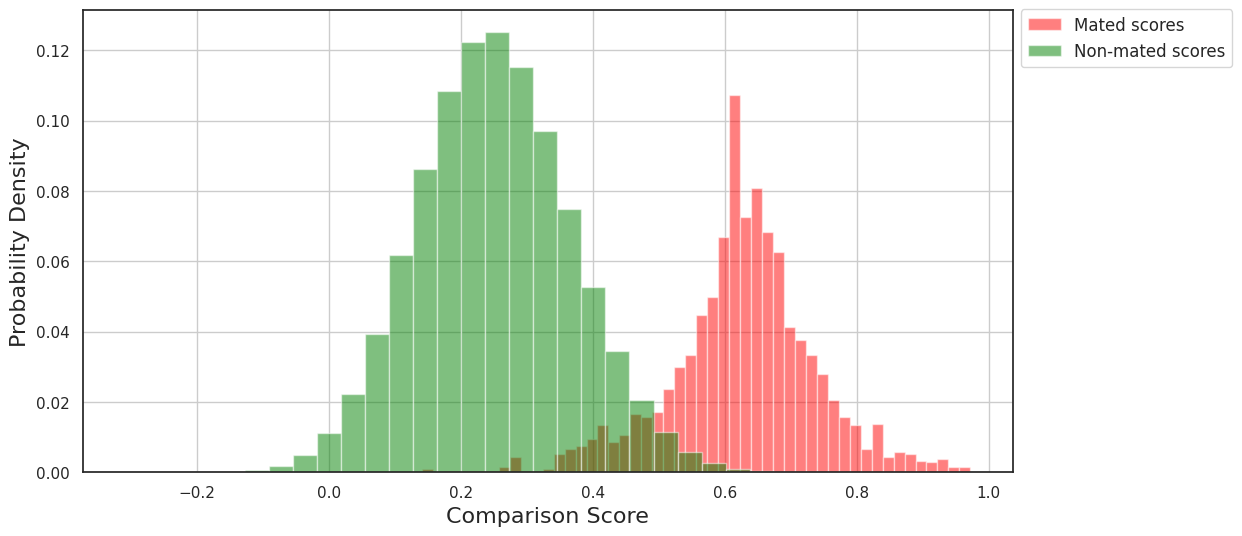

In [42]:

plot_histogram(mated_scores1, nonmated_scores1, normalise=True)


In [ ]:
mated_kde, mated_pos, mated_min, mated_max = get_kde(mated_scores1)
nonmated_kde, nonmated_pos, nonmated_min, nonmated_max = get_kde(nonmated_scores1)
plt.figure(figsize=figure_size)
plt.plot(mated_pos, mated_kde(mated_pos), linewidth=linewidth, color=mated_colour, label=mated_label)
plt.plot(nonmated_pos, nonmated_kde(nonmated_pos), linewidth=linewidth, color=nonmated_colour, label=nonmated_label)
plt.xlabel("Score", size=label_fontsize)
plt.ylabel("Probability Density", size=label_fontsize)
plt.grid(True)
plt.legend(loc=legend_loc, bbox_to_anchor=legend_anchor, ncol=legend_cols, fontsize=legend_fontsize)
plt.show()

In [ ]:
d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
print("d' child =", round(d_prime_system1, round_digits))

d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
print("d' adult =", round(d_prime_system2, round_digits))

# d_prime_system3 = d_prime(mated_scores3, nonmated_scores3)
# print("d' canonical =", round(d_prime_system3, round_digits))


In [ ]:
threshold1 = thold
kde_with_threshold(mated_scores1, nonmated_scores1, scores_type1, threshold1)

In [ ]:
threshold2 = thold
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2)

In [ ]:
det = DET(biometric_evaluation_type='identification', abbreviate_axes=True, plot_eer_line=True, plot_title="Children vs adults")
det.x_limits = np.array([1e-4, .5])
det.y_limits = np.array([1e-4, .5])
det.x_ticks = np.array([1e-3, 1e-2, 5e-2, 20e-2, 40e-2])
det.x_ticklabels = np.array(['0.1', '1', '5', '20', '40'])
det.y_ticks = np.array([1e-3, 1e-2, 5e-2, 20e-2, 40e-2])
det.y_ticklabels = np.array(['0.1', '1', '5', '20', '40'])
det.create_figure()
det.plot(tar=adjust_scores_for_DET(mated_scores1, scores_type1), non=adjust_scores_for_DET(nonmated_scores1, scores_type1), label=system_name1)
det.plot(tar=adjust_scores_for_DET(mated_scores2, scores_type2), non=adjust_scores_for_DET(nonmated_scores2, scores_type2), label=system_name2)
det.legend_on(loc="upper right")
det.show()